## Observations and Insights 

##### From the plot of Tumor Volume vs. Time, we can infer that the Capumolin drug regimen appears to be one of the most effective in reducing the volume of tumors as the tumor volume greatly decreased over time.
##### The data also demonstrates that there is strong positive correlation between average tumor volume and mouse weight.
##### Another insight we can gain from the data is that Capumolin drug regimen has the smallest interquartile range, while Ceftamin has the largest interquartile range. This shows that the Capumolin data points are clustered more tightly, while the Ceftamin data points are more varied and spread out. Additionally, out of the four drug regimens focused on for the Quartiles, Outliers and Boxplots section, Infubinol was the only drug regimen that presented an outlier outside of the interquartile range.

## Initial Preparation

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID") 

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
before_mouse_count = merged_data["Mouse ID"].count()
print(f"The number of mice timepoints before duplicates have been removed is {before_mouse_count}.")

The number of mice timepoints before duplicates have been removed is 1893.


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.duplicated(subset=["Mouse ID","Timepoint"])
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_id = merged_data.copy()
duplicated_mouse_id["Duplicate Mouse ID?"] = duplicated_mouse_id.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_info = duplicated_mouse_id.loc[duplicated_mouse_id["Duplicate Mouse ID?"] == True,:]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate Mouse ID?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = merged_data.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
after_mouse_count = mice_data["Mouse ID"].count()
print(f"The number of mice timepoints after duplicates have been removed is {after_mouse_count}.")

The number of mice timepoints after duplicates have been removed is 1888.


## Summary Statistics

In [7]:
# Use the `groupby` and summary statistical methods to generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
tumor_mean = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean()
tumor_median = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].median()
tumor_var = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].var()
tumor_std = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].std()
tumor_sem = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].sem()

# Assemble the resulting five unique series objects into a single summary dataframe.
groupby_summary_stats = pd.DataFrame(
    {"Mean Tumor Volume": tumor_mean["Tumor Volume (mm3)"],
     "Median Tumor Volume": tumor_median["Tumor Volume (mm3)"],
     "Tumor Volume Variance": tumor_var["Tumor Volume (mm3)"],
     "Tumor Volume Standard Deviation": tumor_std["Tumor Volume (mm3)"],
     "Tumor Volume SEM": tumor_sem["Tumor Volume (mm3)"]
    }
)
groupby_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation (`agg`) method, produce the same summary statistics in a single line.
agg_summary_stats = mice_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(
    {'mean', 'median', 'var', 'std', 'sem'
    }
)

agg_summary_stats = agg_summary_stats.rename(columns=
    {"mean":"Mean",
     "sem":"SEM",
     "var":"Variance",
     "std":"Standard Deviation",
     "median":"Median"}
)
agg_summary_stats

Tumor Volume (mm3)                                  \
                         Median       Mean       SEM   Variance   
Drug Regimen                                                      
Capomulin             41.557809  40.675741  0.329346  24.947764   
Ceftamin              51.776157  52.591172  0.469821  39.290177   
Infubinol             51.820584  52.884795  0.492236  43.128684   
Ketapril              53.698743  55.235638  0.603860  68.553577   
Naftisol              52.509285  54.331565  0.596466  66.173479   
Placebo               52.288934  54.033581  0.581331  61.168083   
Propriva              50.909965  52.393463  0.525862  43.138803   
Ramicane              40.673236  40.216745  0.320955  23.486704   
Stelasyn              52.431737  54.233149  0.573111  59.450562   
Zoniferol             51.818479  53.236507  0.516398  48.533355   

                                 
             Standard Deviation  
Drug Regimen                     
Capomulin              4.994774  
Ceftamin               6.268188  
Infubinol              6.567243  
Ketapril               8.279709  
Naftisol               8.134708  
Placebo                7.821003  
Propriva               6.568014  
Ramicane               4.846308  
Stelasyn               7.710419  
Zoniferol              6.966589

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

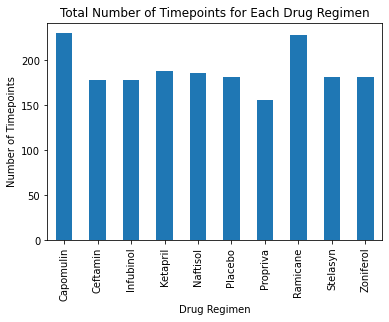

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_regimen_timepoints = mice_data.groupby(["Drug Regimen"])["Timepoint"].count()
pandas_regimen_timepoints.plot(kind="bar", title = "Total Number of Timepoints for Each Drug Regimen", ylabel="Number of Timepoints")

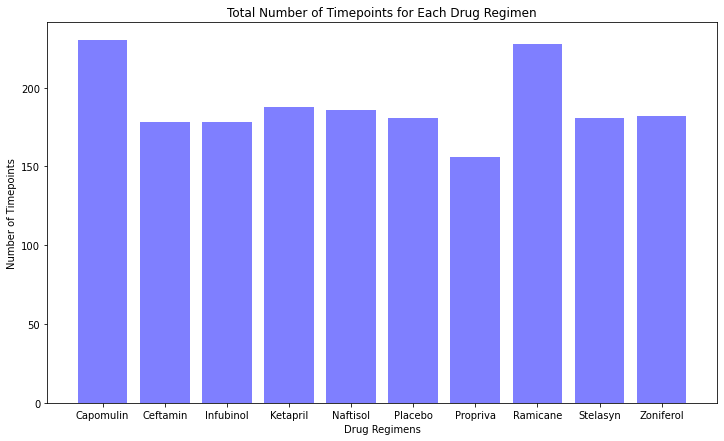

In [10]:
# Put treatments into a list for plot labels (also later for plot labels and for loop)
regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_regimen_timepoints = mice_data.groupby(["Drug Regimen"])["Timepoint"].count()
plt.figure(figsize=(12,7))
plt.bar(regimens, pyplot_regimen_timepoints, color="b", alpha=0.5, align = "center")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Timepoints')
plt.show()

<AxesSubplot:title={'center':'Distribution of Female versus Male Mice'}, ylabel='Mouse ID'>

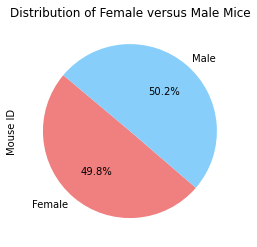

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mouse_ids = mice_data.drop_duplicates(subset=["Mouse ID"])
female_male_distribution = unique_mouse_ids.groupby(["Sex"])["Mouse ID"].count()
female_male_distribution.plot(kind="pie", colors=["lightcoral", "lightskyblue"],
        autopct="%1.1f%%", startangle=140, title = "Distribution of Female versus Male Mice")

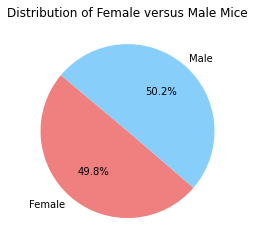

In [12]:
# Define male and female varibles
male_mice = len(unique_mouse_ids.loc[unique_mouse_ids["Sex"]=="Male",:])
female_mice = len(unique_mouse_ids.loc[unique_mouse_ids["Sex"]=="Female",:])

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([female_mice, male_mice], labels=["Female", "Male"], colors=["lightcoral", "lightskyblue"],
        autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the last (greatest) timepoint for each mouse, then refine data to only show four chosen treatment regimens.
final_tumor_volumes = mice_data.loc[mice_data.groupby('Mouse ID')['Timepoint'].idxmax()]
four_regimens = final_tumor_volumes.loc[(final_tumor_volumes["Drug Regimen"]=="Capomulin") |
                        (final_tumor_volumes["Drug Regimen"]=="Ramicane") |
                        (final_tumor_volumes["Drug Regimen"]=="Infubinol") |
                        (final_tumor_volumes["Drug Regimen"]=="Ceftamin")]
four_regimens.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,493,a275,Ceftamin,Female,20,28,45,62.999356,3
3,327,a411,Ramicane,Male,3,22,45,38.407618,1
4,430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
96,124,y793,Capomulin,Male,17,17,45,31.896238,2
97,1855,y865,Ceftamin,Male,23,26,45,64.729837,3
98,84,z578,Ramicane,Male,11,16,45,30.638696,0


In [1]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_box_plots = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_vol_data_list = []
ramicane_tumor_vol_data_list = []
infubinol_tumor_vol_data_list = []
ceftamin_tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for ind in four_regimens.index:
    if four_regimens['Drug Regimen'][ind] == "Capomulin":
        capomulin_tumor_vol_data_list.append(four_regimens['Tumor Volume (mm3)'][ind])
    elif four_regimens['Drug Regimen'][ind] == "Ramicane":
        ramicane_tumor_vol_data_list.append(four_regimens['Tumor Volume (mm3)'][ind])
    elif four_regimens['Drug Regimen'][ind] == "Infubinol":
        infubinol_tumor_vol_data_list.append(four_regimens['Tumor Volume (mm3)'][ind])
    elif four_regimens['Drug Regimen'][ind] == "Ceftamin":
        ceftamin_tumor_vol_data_list.append(four_regimens['Tumor Volume (mm3)'][ind])

# Convert lists to series to use in calculating IQR and determining outliers.
capomulin_tumor_vol_data = pd.Series(capomulin_tumor_vol_data_list)
ramicane_tumor_vol_data = pd.Series(ramicane_tumor_vol_data_list)
infubinol_tumor_vol_data = pd.Series(infubinol_tumor_vol_data_list)
ceftamin_tumor_vol_data = pd.Series(ceftamin_tumor_vol_data_list)

# Determine outliers using upper and lower bounds
#Capomulin
capomulin_quartiles = capomulin_tumor_vol_data.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print("For Capomulin:")
print(f"The lower quartile of tumor volumes is: {capomulin_lowerq}")
print(f"The upper quartile of tumor volumes is: {capomulin_upperq}")
print(f"The interquartile range of tumor volumes is: {capomulin_iqr}")
print(f"The the median of tumor volumes is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

#Ramicane
ramicane_quartiles = ramicane_tumor_vol_data.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print("----------------------------------------------------------")
print("For Ramicane:")
print(f"The lower quartile of tumor volumes is: {ramicane_lowerq}")
print(f"The upper quartile of tumor volumes is: {ramicane_upperq}")
print(f"The interquartile range of tumor volumes is: {ramicane_iqr}")
print(f"The the median of tumor volumes is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

#Infubinol
infubinol_quartiles = infubinol_tumor_vol_data.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print("----------------------------------------------------------")
print("For Infubinol:")
print(f"The lower quartile of tumor volumes is: {infubinol_lowerq}")
print(f"The upper quartile of tumor volumes is: {infubinol_upperq}")
print(f"The interquartile range of tumor volumes is: {infubinol_iqr}")
print(f"The the median of tumor volumes is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")
print("From this, we can determine that there is one outlier below the lower bound of 36.83.")

#Ceftamin
ceftamin_quartiles = ceftamin_tumor_vol_data.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print("----------------------------------------------------------")
print("For Ceftamin:")
print(f"The lower quartile of tumor volumes is: {ceftamin_lowerq}")
print(f"The upper quartile of tumor volumes is: {ceftamin_upperq}")
print(f"The interquartile range of tumor volumes is: {ceftamin_iqr}")
print(f"The the median of tumor volumes is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

NameError: name 'four_regimens' is not defined

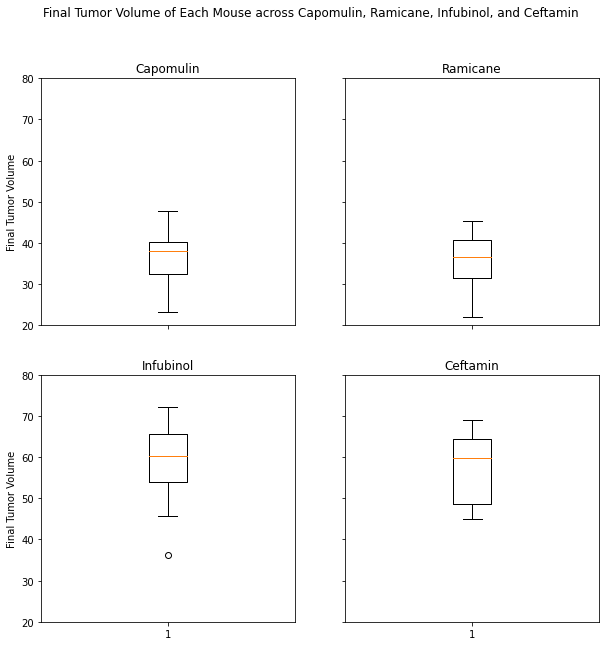

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('Final Tumor Volume of Each Mouse across Capomulin, Ramicane, Infubinol, and Ceftamin')
axs[0, 0].boxplot(capomulin_tumor_vol_data)
axs[0, 0].set_title('Capomulin')
axs[0, 1].boxplot(ramicane_tumor_vol_data)
axs[0, 1].set_title('Ramicane')
axs[1, 0].boxplot(infubinol_tumor_vol_data)
axs[1, 0].set_title('Infubinol')
axs[1, 1].boxplot(ceftamin_tumor_vol_data)
axs[1, 1].set_title('Ceftamin')

for ax in axs.flat:
    ax.set(ylabel='Final Tumor Volume')
    ax.set_ylim([20,80])
    
# Hide y labels for right plots.
for ax in axs.flat:
    ax.label_outer()

## Line and Scatter Plots

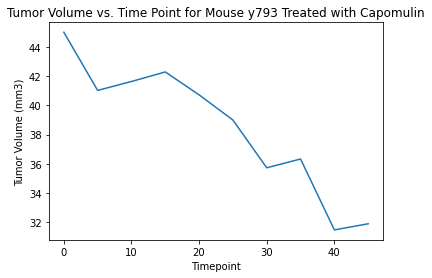

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse y793 was chosen as the sample mouse for mice treated with Capomulin.
sample_mouse = mice_data.loc[mice_data["Mouse ID"]=="y793"]
sample_mouse_time = sample_mouse["Timepoint"]
sample_mouse_volume = sample_mouse["Tumor Volume (mm3)"]
plt.plot(sample_mouse_time,sample_mouse_volume)
plt.title("Tumor Volume vs. Time Point for Mouse y793 Treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

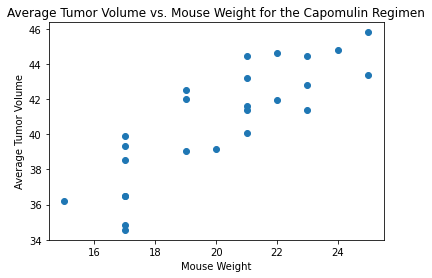

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = mice_data.loc[mice_data["Drug Regimen"]=="Capomulin"]
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_volume = average_tumor_volume.reset_index()
capomulin_mouse_weight = capomulin_data.drop_duplicates(subset=["Mouse ID"])
capomulin_mouse_weight = capomulin_mouse_weight[["Mouse ID","Weight (g)"]]
avg_tumor_volume_weight = pd.merge(average_tumor_volume, capomulin_mouse_weight, on="Mouse ID")
plt.scatter(avg_tumor_volume_weight["Weight (g)"],avg_tumor_volume_weight["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

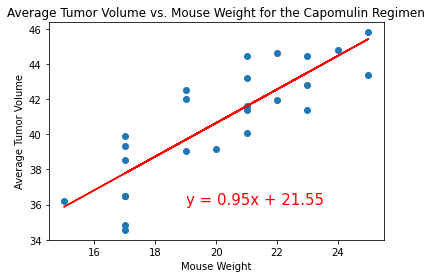

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_volume_weight["Weight (g)"],avg_tumor_volume_weight["Tumor Volume (mm3)"])
regress_values = avg_tumor_volume_weight["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(avg_tumor_volume_weight["Weight (g)"],avg_tumor_volume_weight["Tumor Volume (mm3)"])
plt.plot(avg_tumor_volume_weight["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()